In [6]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.animation import FuncAnimation
import requests
from io import BytesIO
from PIL import Image
from IPython.display import HTML
import urllib.request

plt.rc('font', family = 'malgun gothic')
plt.style.use('fivethirtyeight')

In [7]:
def goosegoose_distribution(n = 10, player = 8,show = False, save = False):

    '''
    베르누이 시행을 따르는 오리 선택 확률을 구스구스덕 게임 룰에 맞춰 그래프로 나타내는 함수입니다.
    오리에 걸릴 확률은 player 의 수에 따라서 다르게 결정됩니다.
    n 번 게임을 시행 할 때 오리가 k 번 걸릴 확률 분포표를 gif 파일 형태로 저장하고 HTML 형태로 띄웁니다.  
    '''
    
    if show == False:
        plt.ioff() # 함수를 시행했을 때 플롯 이미지가 나타나지 않도록 설정 
                    # 또한 ipynb 형태로 plt 를 표현되지 않게 하여 렌더링 되는 그래프의 형태도 다르게 저장 
        
    
    # player 수에 따른 오리에 걸릴 확률 조정

    if player < 10:
        prob = 1/player
    if player >= 10:
        prob = 2/player

    x = np.arange(0, n + 1) # 이산확률분포의 산점도에 들어갈 확률변수
    scalar = np.linspace(0, n + 1, 100) # 이산확률분포표를 매끈하게 그리기 위한 실수값
    graph = [binom.pmf(_, n, prob) for _ in scalar] # 이산확률분포표를 매끈하게 그리기 위한 확률값
    probs = [binom.pmf(_, n, prob) for _ in x] # 이산확률분포의 산점도에 들어갈 확률값
    
    # colors = ['red' if _ == 5 else 'gray' for _ in x] 
    
    def update(k):
    
        ax.collections.clear()
        ax.patches.clear()
        ax.lines.clear()

        ax.plot(scalar, graph, alpha=0.3, c = 'blue') # 실수 값을 이용해 매끈한 형태의 확률 분포표 그래프 생성
        
        # 오리에 k 번 이하 걸릴 확률과 k 번 이상 걸릴 확률에 대한 누적 확률 분포 
        # fill_between 에 사용됨
        
        x1 = np.linspace(0, k, 100)
        y1 = [binom.pmf(_, n, prob) for _ in x1]

        x2 = np.linspace(k, n + 1, 100)
        y2 = [binom.pmf(_, n, prob) for _ in x2]
        
        under_prob = binom.cdf(k,n,prob)
        over_prob = 1 - under_prob

        ax.fill_between(x1, y1, alpha=0.3, color='blue', label=f'{k} 번 이하 오리에 걸릴 확률 : {int(under_prob * 100)}%')
        ax.fill_between(x2, y2, alpha=0.3, color='red', label=f'{k} 번 이상 오리에 걸릴 확률 : {int(over_prob * 100)}%')
        
        colors = ['red' if _ == k else 'gray' for _ in x] # 이산확률분포의 산점도에서 k 값 업데이트에 따른 산점도 색상 변경 
        
        ax.scatter(x, probs, c = colors) # 이산확률분포표의 산점도 생성, 해당하는 k 값에 따라 산점도의 색상이 바뀜

        # 산점도 위에 해당 확률값 넣기 
        
        k_coord = (x[k], probs[k]) # 산점도의 위치 값 좌표로 저장
        ax.text(k_coord[0], k_coord[1] + 0.01, f'{round(probs[k] * 100,1)}%') # 산점도에서 위치 값위에 text 플로팅

        # 직선으로 해당 확률 값 위치 강조 
        ax.plot([k, k], [0, probs[k]], c='k', ls='--', lw=0.5)
        ax.plot([-0.1, k], [probs[k], probs[k]], c='k', ls='--', lw=0.5)

        # 범례 넣기 
        ax.legend(loc='upper right', fontsize = 20)

        # x,y 축 지정
        ax.set_xlim([-0.1, n])
        ax.set_ylim([0, max(graph) + 0.05])
        ax.set_yticks(np.arange(0,max(graph) + 0.05,0.05))
        ax.set_yticklabels([f'{int(_ * 100)}%' for _ in ax.get_yticks()])
        fig.suptitle(f'{player}명과 게임을 {n}번 시행 할 때 오리가 {k}번 걸릴 확률분포표',
                        fontsize = 30)

        # n 의 수가 너무 크면 xticks 를 자동으로 조정하여 사용하고 적당하다면 모든 판수를 floating 
        if n < 31:
            ax.set_xticks(x)

        return ax

    fig, ax = plt.subplots()
    
    # 깃허브에 저장된 이미지 파일 배경으로 사용하기 
    url = "https://github.com/yonghyeun/GooseGooseProject/blob/main/data/goosgooseimg.jpg?raw=true" 
    with urllib.request.urlopen(url) as url_response:
        img_data = url_response.read()
        
    img = Image.open(BytesIO(img_data))
    img = np.array(img)
        
    
    fig.figimage(img, 0, 0, alpha = 0.05, origin = 'upper', resize = True)
    ax.set_xlabel('오리가 걸린 사건 수 ')
    ax.set_ylabel('확률')
    
    anim = FuncAnimation(fig, update, frames = n+1, interval = 500, repeat = True)
    
    if save == True: # 저장을 원할 시 goosegoose_distribution 이란 이름으로 저장 
        anim.save('goosegoose_distribution.gif', writer = 'pillow')
    
    return HTML(anim.to_jshtml())

In [8]:
html = goosegoose_distribution()

In [9]:
html

In [74]:
def goosegoose_neg_distribution(n = 10,k = 1, player = 8,show = False, save = False):

    '''
    베르누이 시행을 따르는 오리 선택 확률을 구스구스덕 게임 룰에 맞춰 그래프로 나타내는 함수입니다.
    오리에 걸릴 확률은 player 의 수에 따라서 다르게 결정됩니다.
    k 번 오리가 걸릴 때 n 번에 게임에 대한 확률 분포표를 gif 파일 형태로 저장하고 HTML 형태로 띄웁니다.  
    '''
    
    if show == False:
        plt.ioff() # 함수를 시행했을 때 플롯 이미지가 나타나지 않도록 설정 
                    # 또한 ipynb 형태로 plt 를 표현되지 않게 하여 렌더링 되는 그래프의 형태도 다르게 저장 
        
    
    # player 수에 따른 오리에 걸릴 확률 조정

    if player < 10:
        prob = 1/player
    if player >= 10:
        prob = 2/player

    x = np.arange(0, n + 1) # 이산확률분포의 산점도에 들어갈 확률변수 (판 수)
    scalar = np.linspace(0, n + 1, 100) # 이산확률분포표를 매끈하게 그리기 위한 실수값
    graph = [binom.pmf(k, _, prob) for _ in scalar] # 이산확률분포표를 매끈하게 그리기 위한 확률값 (k 고정)
    probs = [binom.pmf(k, _, prob) for _ in x] # 이산확률분포의 산점도에 들어갈 확률값
    
    def update(n):
    
        ax.collections.clear()
        ax.patches.clear()
        ax.lines.clear()

        ax.plot(x, probs, alpha=0.3, c = 'blue') # 실수 값을 이용해 매끈한 형태의 확률 분포표 그래프 생성
        
        # 오리에 k 번 이하 걸릴 확률과 k 번 이상 걸릴 확률에 대한 누적 확률 분포 
        # fill_between 에 사용됨
        
        x1 = np.arange(0, n+1)
        y1 = [binom.pmf(k, _, prob) for _ in x1]

        x2 = np.arange(n, max(n)+1, 100)
        y2 = [binom.pmf(k, _, prob) for _ in x2]
        
        under_prob = binom.cdf(k,n,prob)
        over_prob = 1 - under_prob

        ax.fill_between(x1, y1, alpha=0.3, color='blue', label=f'{k} 번 이하 오리에 걸릴 확률 : {int(under_prob * 100)}%')
        ax.fill_between(x2, y2, alpha=0.3, color='red', label=f'{k} 번 이상 오리에 걸릴 확률 : {int(over_prob * 100)}%')
        
        colors = ['red' if _ == n else 'gray' for _ in x] # 이산확률분포의 산점도에서 k 값 업데이트에 따른 산점도 색상 변경 
        
        ax.scatter(x, probs, c = colors) # 이산확률분포표의 산점도 생성, 해당하는 k 값에 따라 산점도의 색상이 바뀜

        # 산점도 위에 해당 확률값 넣기 
        
        k_coord = (x[n], probs[n]) # 산점도의 위치 값 좌표로 저장
        ax.text(k_coord[0], k_coord[1] + 0.01, f'{round(probs[n] * 100,1)}%') # 산점도에서 위치 값위에 text 플로팅

        # 직선으로 해당 확률 값 위치 강조 
        ax.plot([n, n], [0, probs[n]], c='k', ls='--', lw=0.5)
        ax.plot([-0.1, n], [probs[n], probs[n]], c='k', ls='--', lw=0.5)

        # 범례 넣기 
        # ax.legend(loc='upper right', fontsize = 20)

        # x,y 축 지정
        ax.set_xlim([-0.1, n+0.5])
        # ax.set_ylim([0, max(graph) + 0.05])
        # ax.set_yticks(np.arange(0,max(graph) + 0.05,0.05))
        # ax.set_yticklabels([f'{int(_ * 100)}%' for _ in ax.get_yticks()])
        
        ax.set_xlabel('게임 판 수')
        ax.set_ylabel('확률')

        fig.suptitle(f'{player}명과 게임을 {n}번 시행 할 때 오리가 {k} 번 걸릴 확률분포표',
                        fontsize = 30)

        # n 의 수가 너무 크면 xticks 를 자동으로 조정하여 사용하고 적당하다면 모든 판수를 floating 
        if n < 31:
            ax.set_xticks(x)

        return ax

    fig, ax = plt.subplots()
    
    # 깃허브에 저장된 이미지 파일 배경으로 사용하기 
    url = "https://github.com/yonghyeun/GooseGooseProject/blob/main/data/goosgooseimg.jpg?raw=true" 
    with urllib.request.urlopen(url) as url_response:
        img_data = url_response.read()
        
    img = Image.open(BytesIO(img_data))
    img = np.array(img)
        
    
    fig.figimage(img, 0, 0, alpha = 0.05, origin = 'upper', resize = True)
    
    anim = FuncAnimation(fig, update, frames = n+1, interval = 500, repeat = True)
    
    if save == True: # 저장을 원할 시 goosegoose_distribution 이란 이름으로 저장 
        anim.save('goosegoose_distribution.gif', writer = 'pillow')
    
    return HTML(anim.to_jshtml())

In [75]:
html= goosegoose_neg_distribution(n = 10, k = 3)
html

TypeError: 'int' object is not iterable

In [69]:
n = 10
prob = 0.1
k = 1

x1 = np.arange(0, n+1)
y1 = [binom.pmf(k, _, prob) for _ in x1]

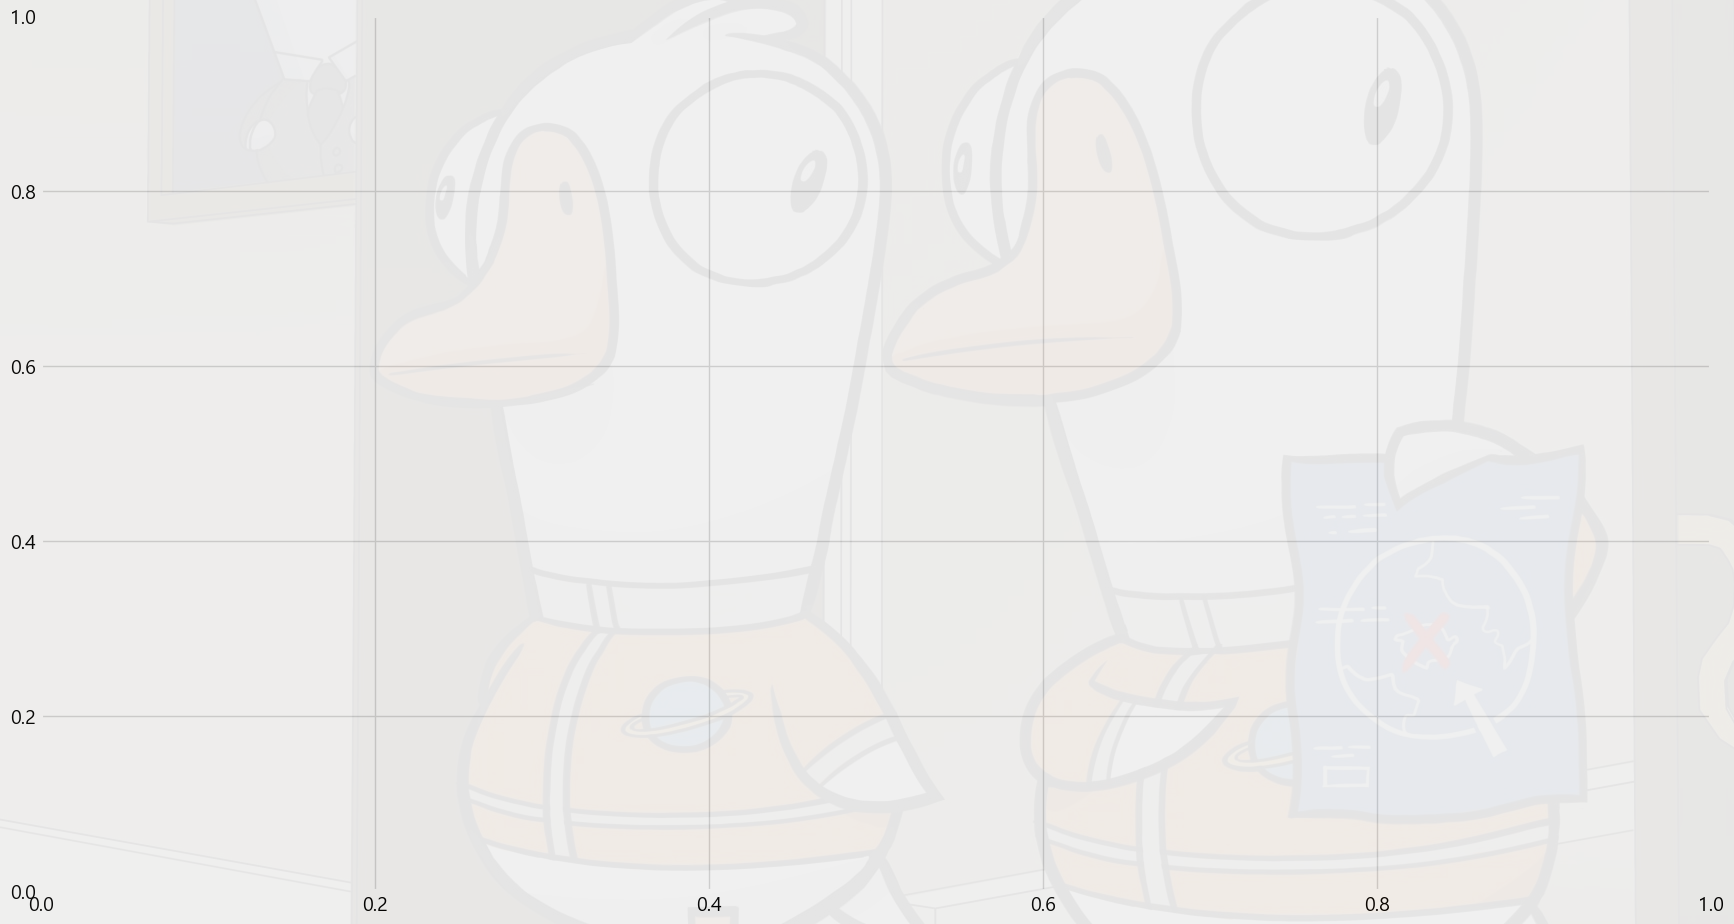

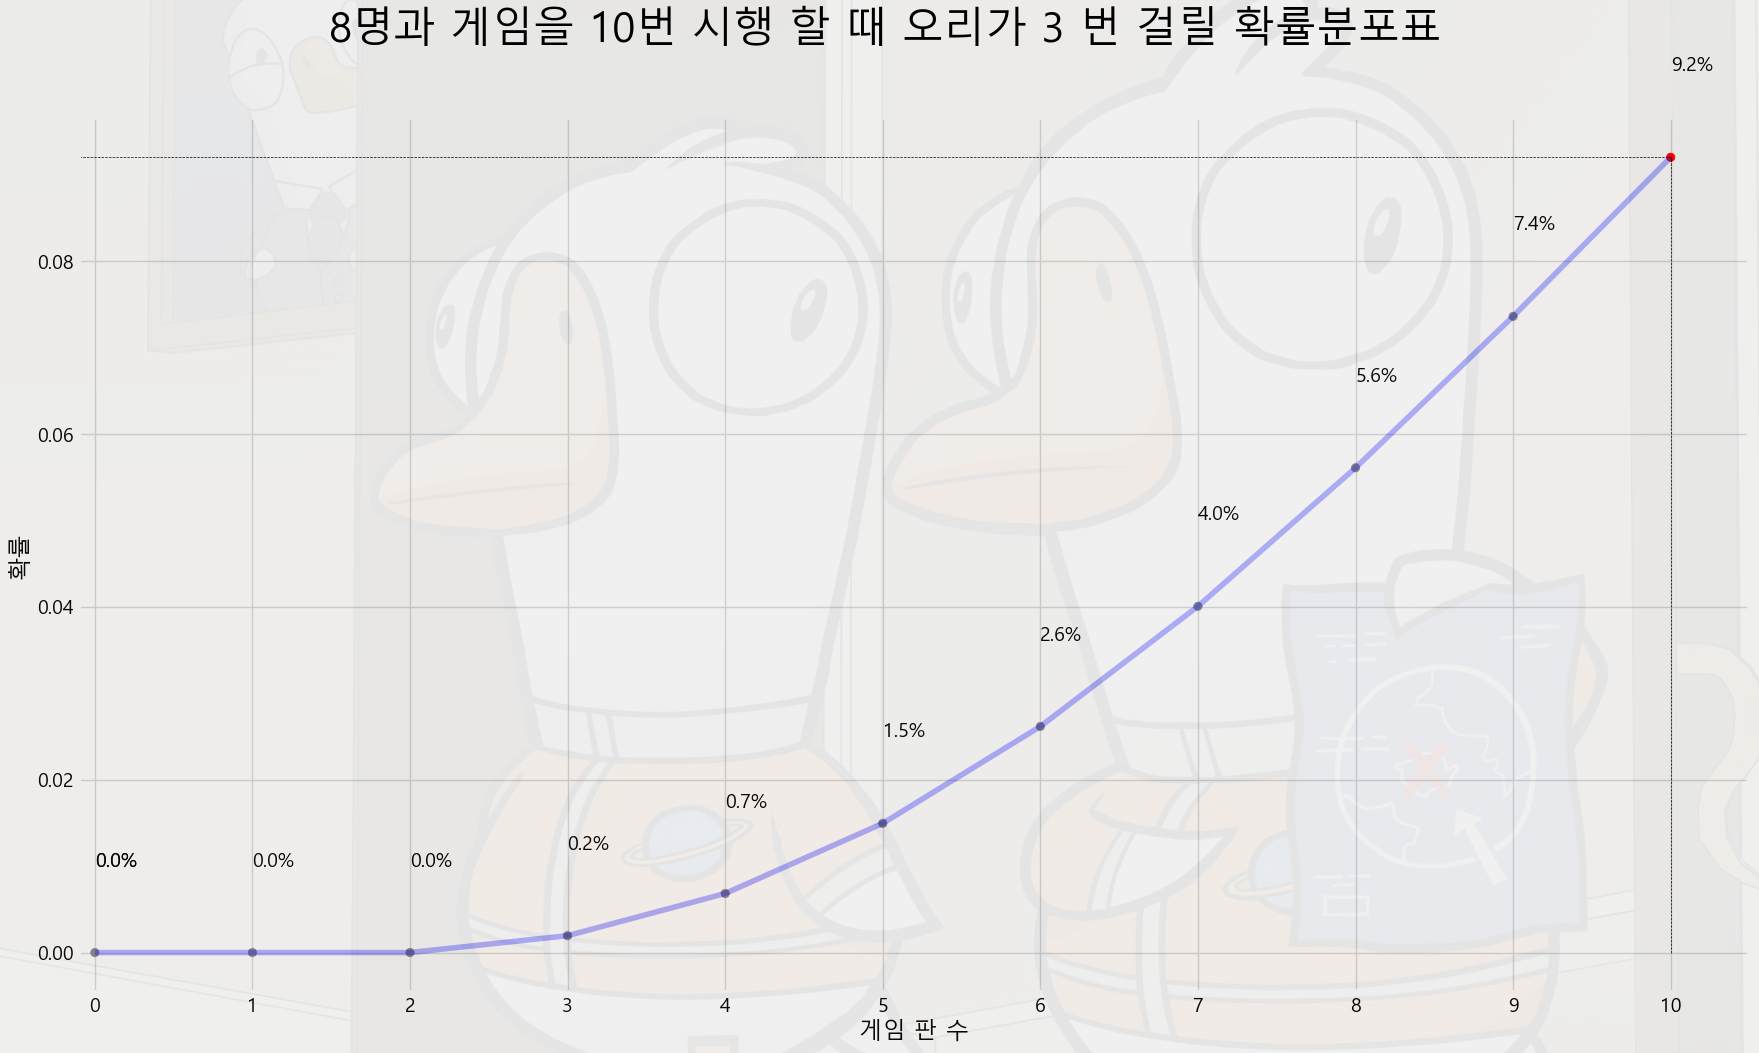

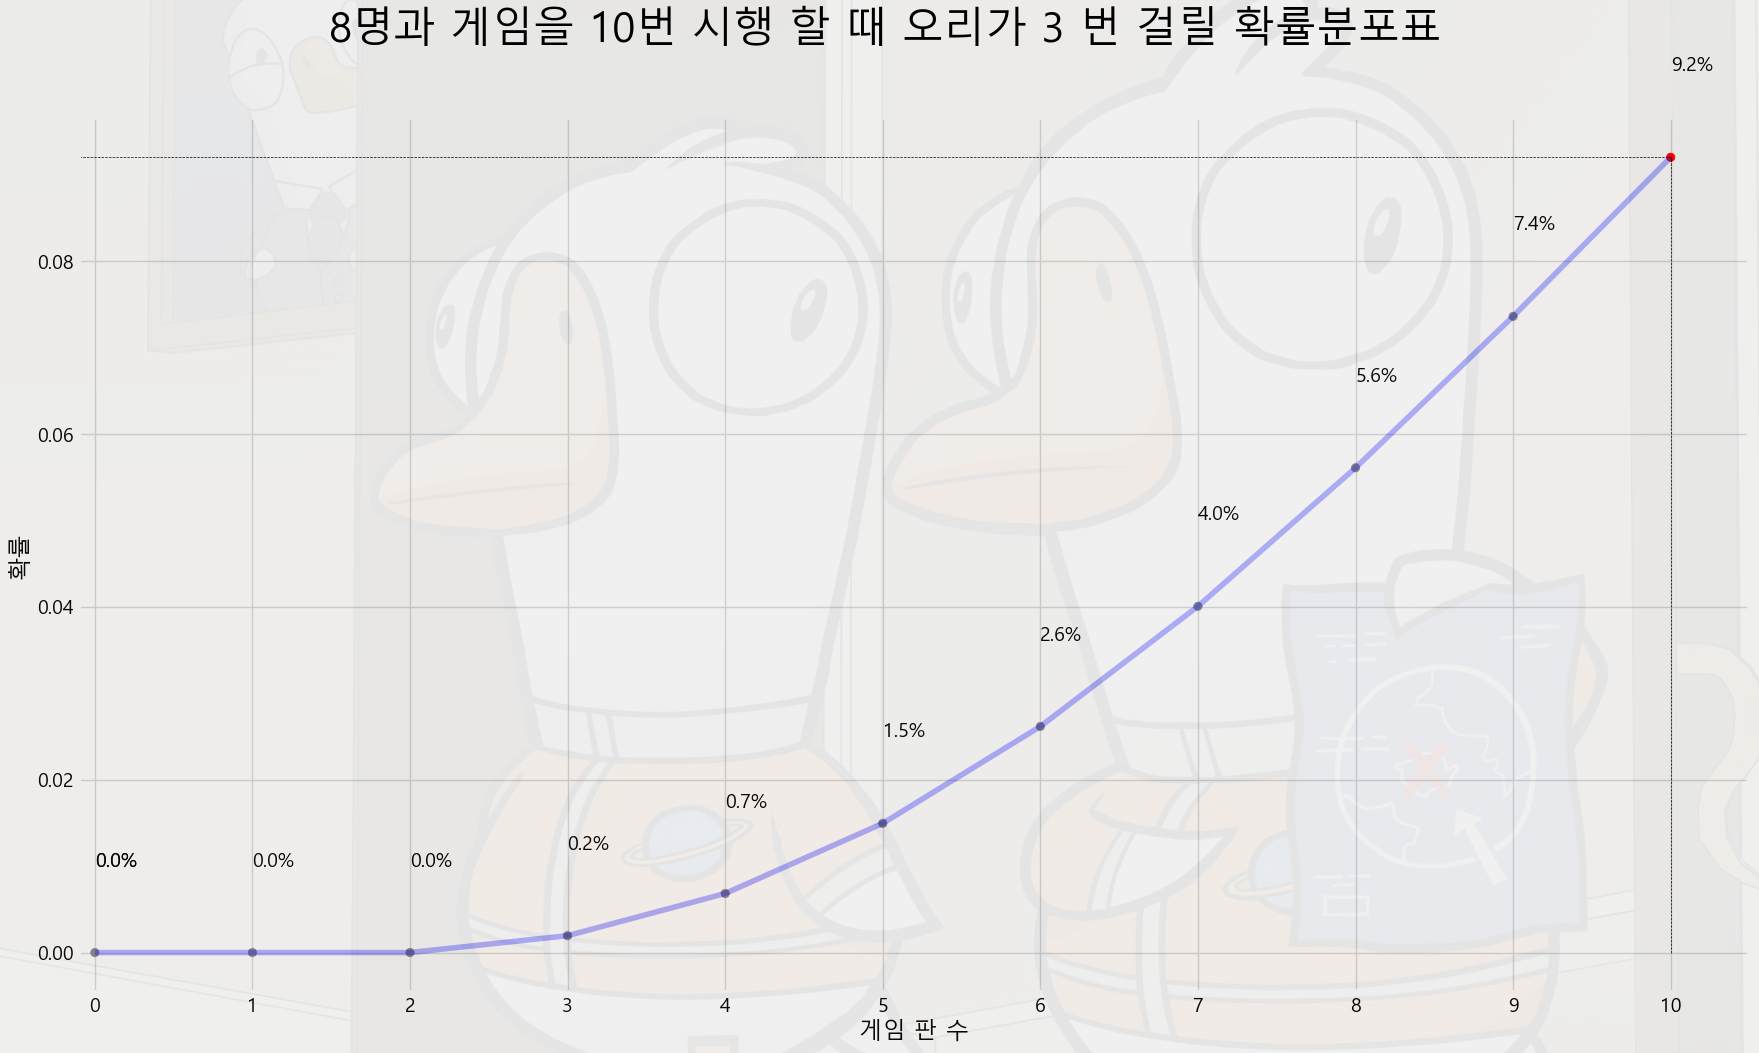

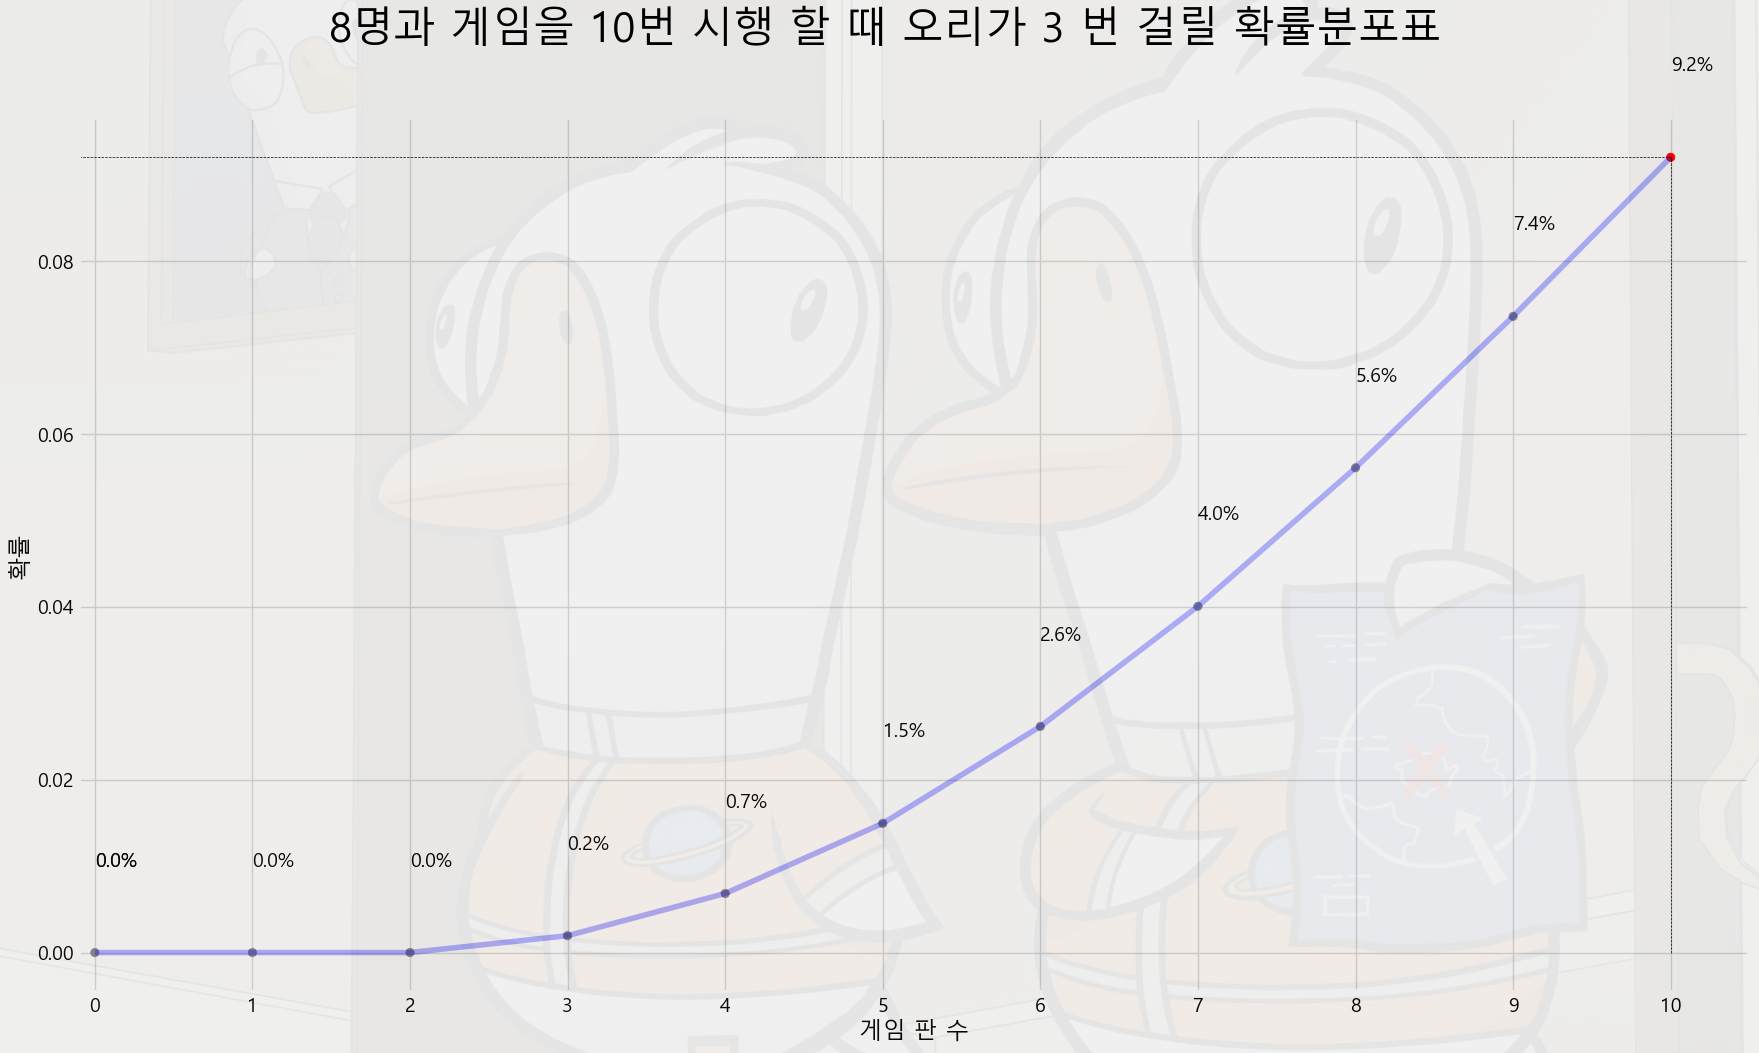

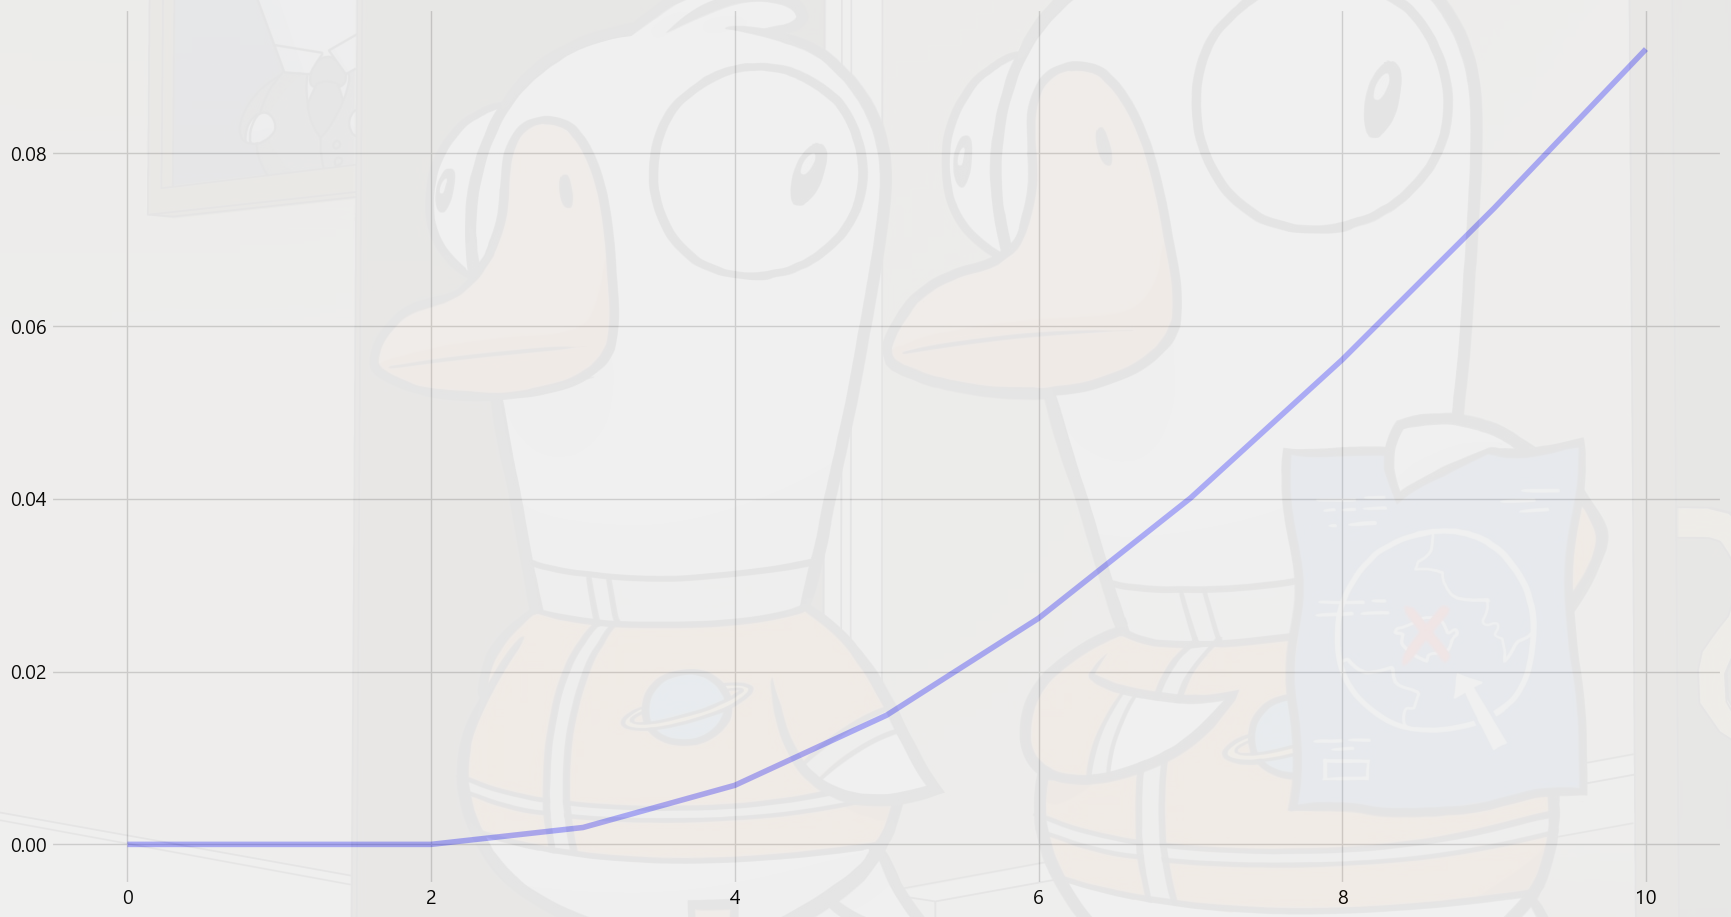

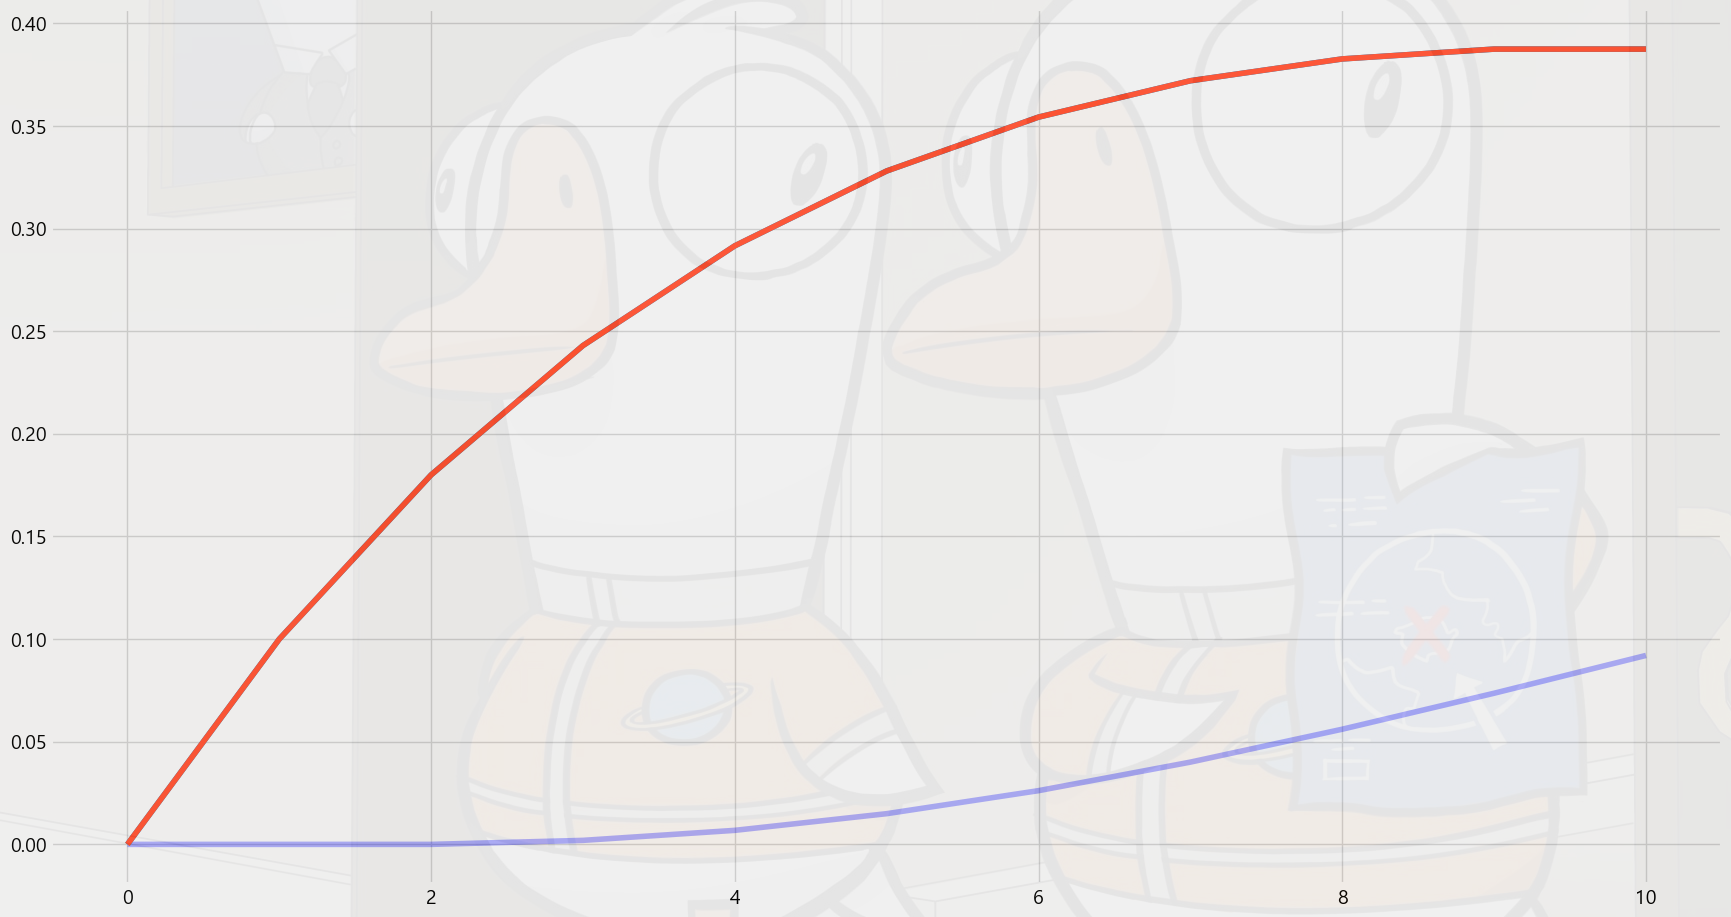

In [73]:
plt.plot(x1,y1)
plt.show()